Keval Shah


60009220061


IPCV Lab8

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

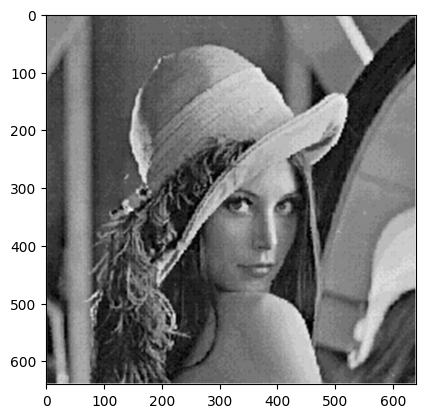

In [42]:
g = cv2.imread('/content/lena_forsen.jpg', 1)
plt.imshow(g)

In [43]:
g.shape

(640, 640, 3)

In [44]:
image = cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)

In [45]:
image.shape

(640, 640)

In [20]:
def plot_images(original, filtered, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

In [19]:
def dft_2d(image):
    M, N = image.shape
    result = np.zeros((M, N), dtype=complex)

    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    exponent = np.exp(-2j * np.pi * ((u * x / M) + (v * y / N)))
                    sum_value += image[x, y] * exponent
            result[u, v] = sum_value
    return result

In [46]:
rows, cols = image.shape
x = np.arange(rows).reshape(rows, 1)
y = np.arange(cols).reshape(1, cols)
shifted_image = image * ((-1) ** (x + y))

In [50]:
dft = np.fft.fft2(shifted_image)

In [51]:
dft_shifted = np.fft.fftshift(dft)
m = np.log(np.abs(dft_shifted) + 1)

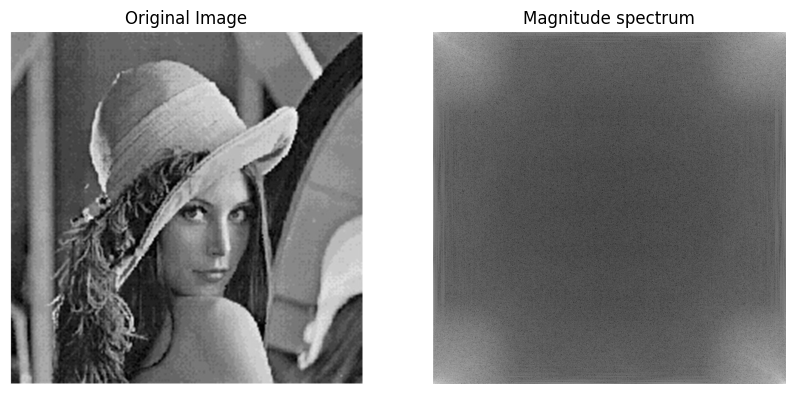

In [52]:
plot_images(image, m, 'Magnitude spectrum')

In [53]:
def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            D_uv = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            if D_uv <= cutoff:
                mask[u, v] = 1
    return mask

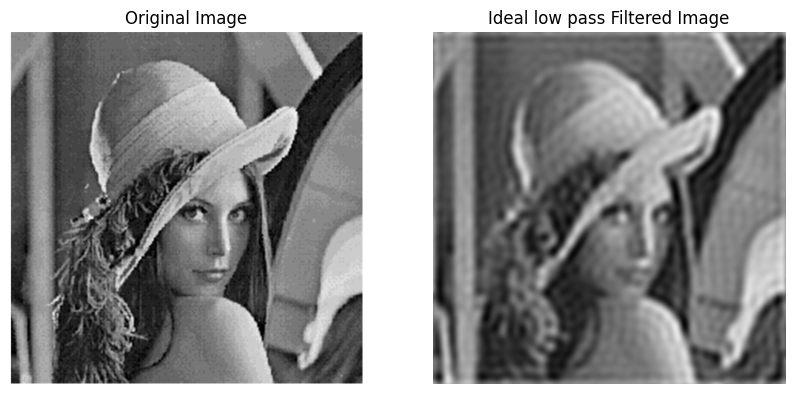

In [56]:
rows, cols = image.shape
cutoff_frequency = 30
lp_filter = ideal_low_pass_filter((rows, cols), cutoff_frequency)

dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

filtered_dft = dft_shifted * lp_filter
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft)).real

plot_images(image, filtered_image, 'Ideal low pass Filtered Image')

In [57]:
def ideal_high_pass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            D_uv = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            if D_uv <= cutoff:
                mask[u, v] = 0
    return mask

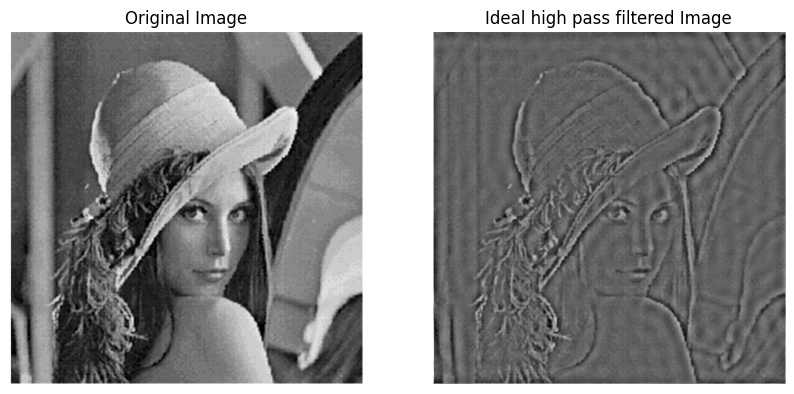

In [58]:
rows, cols = image.shape
cutoff_frequency = 20
hp_filter = ideal_high_pass_filter((rows, cols), cutoff_frequency)

dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

filtered_dft = dft_shifted * hp_filter
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft)).real

plot_images(image, filtered_image, 'Ideal high pass filtered Image')

In [59]:
def gaussian_low_pass_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            D_uv = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            mask[u, v] = np.exp(-(D_uv ** 2) / (2 * sigma ** 2))
    return mask

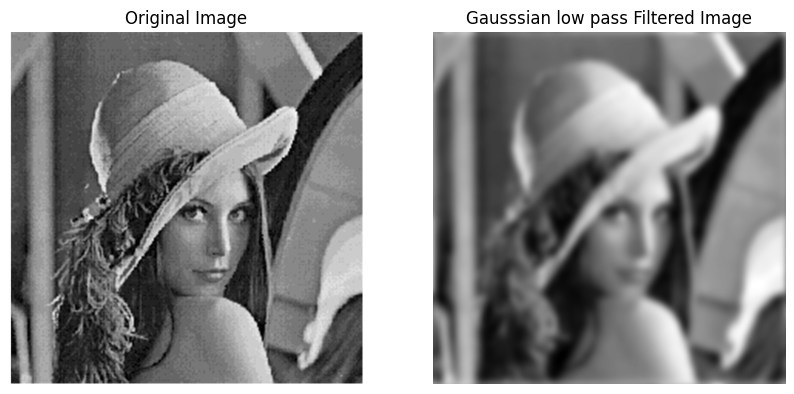

In [61]:
sigma = 15
glp_filter = gaussian_low_pass_filter(image.shape, sigma)

dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

filtered_dft = dft_shifted * glp_filter
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft)).real

plot_images(image, filtered_image, 'Gausssian low pass Filtered Image')

In [62]:
def gaussian_high_pass_filter(shape, sigma):
    return 1 - gaussian_low_pass_filter(shape, sigma)

In [63]:
sigma = 15
ghp_filter = gaussian_high_pass_filter(image.shape, sigma)

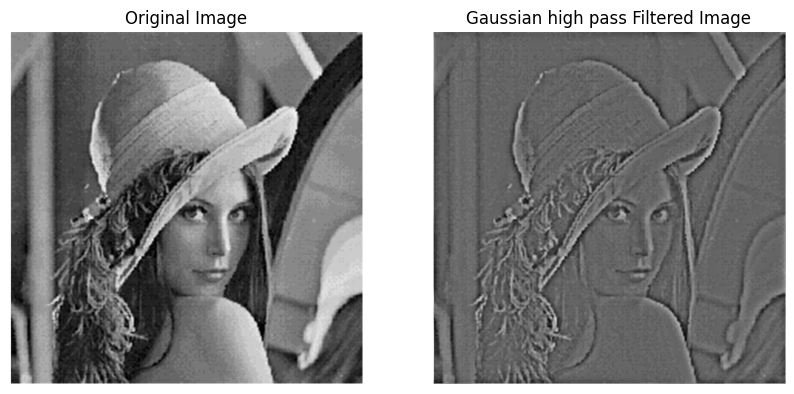

In [65]:
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

filtered_dft = dft_shifted * ghp_filter
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft)).real

plot_images(image, filtered_image, 'Gaussian high pass Filtered Image')

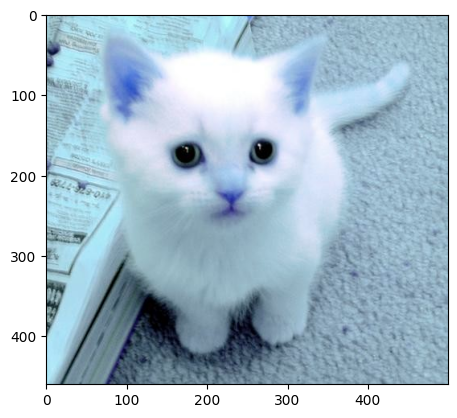

In [66]:
img = cv2.imread("/content/cat.jpg",1)
plt.imshow(img)

In [67]:
img.shape

(460, 500, 3)

In [68]:
def display_images(original, filtered, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

In [87]:
def apply_filter(image, filter_mask, brightening_constant=30):
    dft = np.fft.fft2(image)
    dft_shifted = np.fft.fftshift(dft)
    filtered_dft = dft_shifted * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft)).real
    # Brighten the filtered image
    filtered_image += brightening_constant
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

In [88]:
cutoff = 25
sigma = 5
rows, cols, channels = img.shape

ideal_lp_filter = ideal_low_pass_filter((rows, cols), cutoff)
ideal_hp_filter = ideal_high_pass_filter((rows, cols), cutoff)
gaussian_lp_filter = gaussian_low_pass_filter((rows, cols), sigma)
gaussian_hp_filter = gaussian_high_pass_filter((rows, cols), sigma)

filtered_img_ideal_lp = np.zeros_like(img)
filtered_img_ideal_hp = np.zeros_like(img)
filtered_img_gaussian_lp = np.zeros_like(img)
filtered_img_gaussian_hp = np.zeros_like(img)

for c in range(channels):
    filtered_img_ideal_lp[..., c] = apply_filter(img[..., c], ideal_lp_filter)
    filtered_img_ideal_hp[..., c] = apply_filter(img[..., c], ideal_hp_filter)
    filtered_img_gaussian_lp[..., c] = apply_filter(img[..., c], gaussian_lp_filter)
    filtered_img_gaussian_hp[..., c] = apply_filter(img[..., c], gaussian_hp_filter)

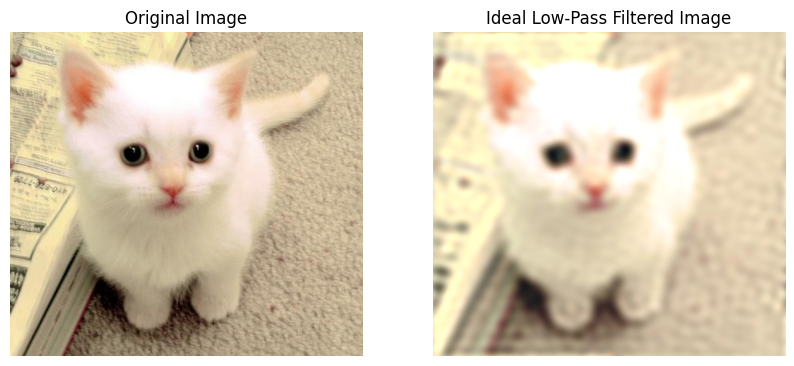

In [90]:
display_images(img, filtered_img_ideal_lp, 'Ideal Low-Pass Filtered Image')

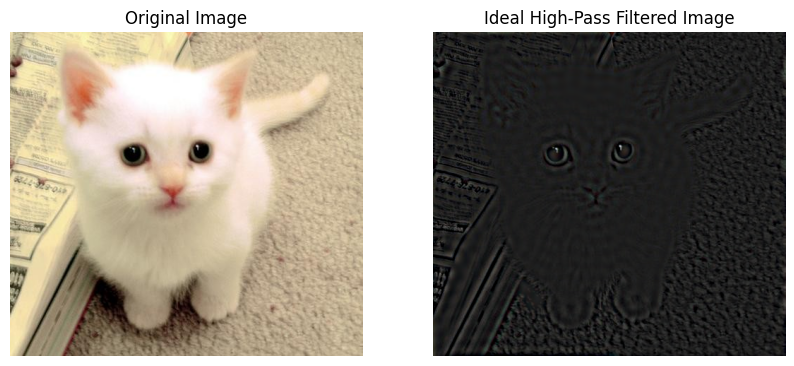

In [94]:
display_images(img, filtered_img_ideal_hp, 'Ideal High-Pass Filtered Image')

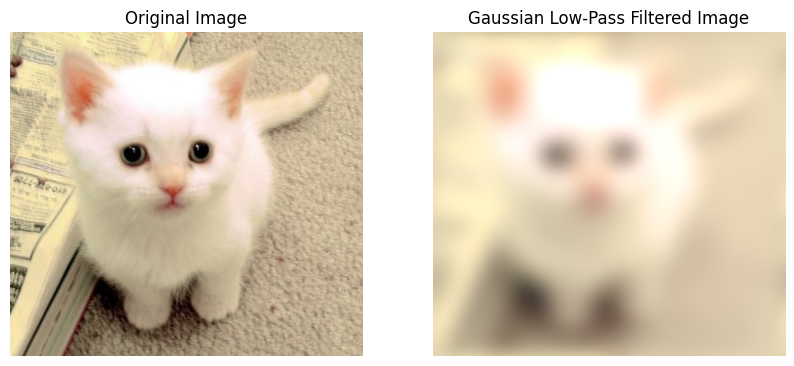

In [91]:
display_images(img, filtered_img_gaussian_lp, 'Gaussian Low-Pass Filtered Image')

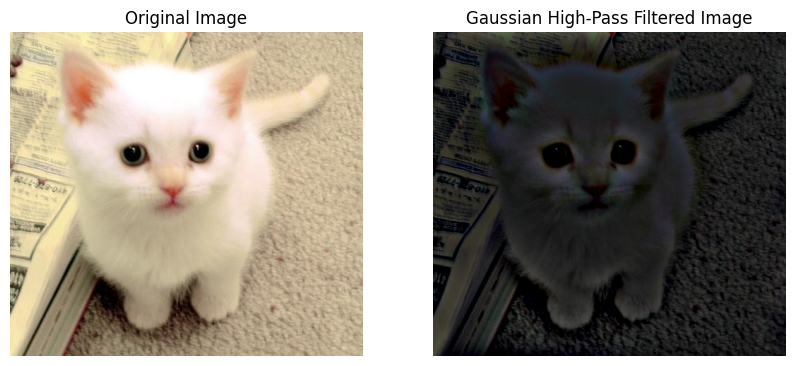

In [92]:
display_images(img, filtered_img_gaussian_hp, 'Gaussian High-Pass Filtered Image')

## Conclusion

In this experiment, we explored various image filtering techniques, focusing on ideal and Gaussian low-pass and high-pass filters.

The results demonstrated that high-pass filters enhance the edges and fine details of an image while low-pass filters help in noise reduction and smoothing.

### Applications of Image Filtering Techniques:

- **Image Enhancement**: Improving the quality of images for better visual interpretation.
- **Noise Reduction**: Reducing unwanted noise in images, especially in medical imaging and satellite imagery.
- **Edge Detection**: Extracting features and edges for object detection and recognition in computer vision applications.
- **Image Compression**: Helping in compressing images by removing less significant frequency components.
- **Video Processing**: Enhancing video frames for clearer visuals and analysis.


